In [2]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

# 전항지 출항 확인

전항지 출항 지점 확인

In [3]:
path_dir = 'voy_path'
 
file_list = os.listdir(path_dir)
file_new_list = []
for i in file_list:
    if "portmis" in i:
        file_new_list.append(i)

In [4]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

# 시각화 툴로 processed된 것들 확인

항로 클러스터링

In [5]:
# dense_upper_china_list = ['COSCO_FOS_VRKR6_23processed'
# ,'AKA_BHUM_9V7282_7processed'
# , 'COSCO_FOS_VRKR6_25processed'
# , 'MSC_LA_SPEZIA_DIGX2_2processed'
# , 'OOCL_NEW_YORK_VRJS2_2processed'
# , 'MSC_WASHINGTON_5LDP4_4processed'
# , 'MSC_SOFIA_PAZ_D5FL9_2processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_26processed'
# , 'OOCL_HAMBURG_VRZK9_6processed'
# , 'SEAMAX_STRATFORD_V7EP2_6processed'
# , 'OOCL_LUXEMBOURG_VRGO3_5processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_25processed'
# , 'MSC_LUCIANA_3FTY3_4processed'
# , 'MSC_RENEE_VRPL2_5processed'
# , 'COSCO_FOS_VRKR6_24processed'
# , 'COSCO_FOS_VRKR6_20processed'
# , 'COSCO_FOS_VRKR6_26processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_23processed'
# , 'OOCL_HAMBURG_VRZK9_5processed']

# OOCL_HAMBURG_voyages_list = [
#     'COSCO_FOS_VRKR6_2022_20processed', 'COSCO_FOS_VRKR6_2022_23processed',
#     'COSCO_FOS_VRKR6_2022_24processed', 'COSCO_FOS_VRKR6_2022_25processed',
#     'OOCL_GENOA_VROK9_2022_5processed', 'COSCO_FOS_VRKR6_2022_27processed',
#     'COSCO_FOS_VRKR6_2022_28processed', 'OOCL_GENOA_VROK9_2022_5processed',
#     'COSCO_FOS_VRKR6_2022_30processed'
# ]

# OOCL_HAMBURG_voyages_list = [
#     'OOCL_GENOA_VROK9_2022_5processed', 'AKA_BHUM_9V7282_2022_8processed'
# ]
# OOCL_HAMBURG_voyages_list = [
#     'OOCL_NEW_YORK_VRJS2_2022_1processed',
#     'OOCL_GENOA_VROK9_2022_5processed',
#     'OOCL_NEW_YORK_VRJS2_2022_3processed'
# ]

# OOCL_HAMBURG_voyages_list = [
#     'OOCL_LUXEMBOURG_VRGO3_2022_5processed',
#     'OOCL_GENOA_VROK9_2022_5processed'
# ]

# OOCL_HAMBURG_voyages_list = [
#     'OOCL_GENOA_VROK9_2022_3processed', 'OOCL_GENOA_VROK9_2022_5processed'
# ]

# OOCL_HAMBURG_voyages_list = [
#     'OOCL_HAMBURG_VRZK9_2022_5processed', 'OOCL_HAMBURG_VRZK9_2022_6processed'
# ]

# SEAMAX_STRATFORD_voyages_list = [
#     'SEAMAX_STRATFORD_V7EP2_2022_6processed',
#     'SEAMAX_STRATFORD_V7EP2_2022_7processed'
# ]

# ZIM_CHARLESTORN_voyages_list = [
#     'ZIM_CHARLESTON_VRUC3_2022_6processed',
#     'ZIM_CHARLESTON_VRUC3_2022_7processed'
# ]

single_voyage_list = [
    'MSC_ARIANE_3FDA3_2022_1processed', 'MSC_DANIT_3FZU8_2022_2processed',
    'MSC_EVA_3EVM7_2022_1processed', 'MSC_EXPRESS_III_A8LG7_2022_1processed',
    'MSC_KANOKO_D5TM3_2023_1processed', 'MSC_LA_SPEZIA_DIGX2_2022_2processed',
    'MSC_VANESSA_HOWD_2023_1processed', 'MSC_VIRGO_CQEB9_2023_2processed',
    'MSC_SOFIA_PAZ_D5FL9_2022_2processed',
    'MSC_WASHINGTON_5LDP4_2022_4processed',
    'MSC_RAVENNA_A8ZU8_2022_3processed', 'MSC_VANDYA_3FDW4_2022_2processed',
    'MSC_RENEE_VRPL2_2022_5processed', 'SEASPAN_OCEANIA_VRBI2_2023_1processed',
    'SEASPAN_BREEZE_VRNL8_2023_1processed', 'VALENCE_9HA3398_2023_1processed','ZIM_CHARLESTON_VRUC3_2022_6processed',
    'ZIM_CHARLESTON_VRUC3_2022_7processed','SEAMAX_STRATFORD_V7EP2_2022_6processed',
    'SEAMAX_STRATFORD_V7EP2_2022_7processed','OOCL_HAMBURG_VRZK9_2022_5processed', 'OOCL_HAMBURG_VRZK9_2022_6processed'
]

In [6]:
upper_china_path_dir = 'voy_path/upper_china/processed/'

# Tianjin to Busan PNIT

## 남은 선박들

In [8]:
single_voyage_list

['MSC_ARIANE_3FDA3_2022_1processed',
 'MSC_DANIT_3FZU8_2022_2processed',
 'MSC_EVA_3EVM7_2022_1processed',
 'MSC_EXPRESS_III_A8LG7_2022_1processed',
 'MSC_KANOKO_D5TM3_2023_1processed',
 'MSC_LA_SPEZIA_DIGX2_2022_2processed',
 'MSC_VANESSA_HOWD_2023_1processed',
 'MSC_VIRGO_CQEB9_2023_2processed',
 'MSC_SOFIA_PAZ_D5FL9_2022_2processed',
 'MSC_WASHINGTON_5LDP4_2022_4processed',
 'MSC_RAVENNA_A8ZU8_2022_3processed',
 'MSC_VANDYA_3FDW4_2022_2processed',
 'MSC_RENEE_VRPL2_2022_5processed',
 'SEASPAN_OCEANIA_VRBI2_2023_1processed',
 'SEASPAN_BREEZE_VRNL8_2023_1processed',
 'VALENCE_9HA3398_2023_1processed',
 'ZIM_CHARLESTON_VRUC3_2022_6processed',
 'ZIM_CHARLESTON_VRUC3_2022_7processed',
 'SEAMAX_STRATFORD_V7EP2_2022_6processed',
 'SEAMAX_STRATFORD_V7EP2_2022_7processed',
 'OOCL_HAMBURG_VRZK9_2022_5processed',
 'OOCL_HAMBURG_VRZK9_2022_6processed']

## below 3 knot 제거

### interpolation 1000

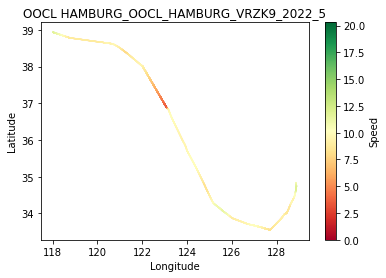

보간법 전 일반 평균 속도 : 9.516666666666667
보간법 전 일반 속도 표준편차: 1.1143062064254698
보간법 전 저속 제거 평균 속도 : 9.516666666666667
보간법 전 저속 제거 속도 표준편차: 1.1143062064254698
-
보간법 후 일반 평균 속도 : 8.28721109302269
보간법 후 일반 속도 표준편차: 1.9442183543444145
보간법 후 저속 제거 평균 속도 : 8.28721109302269
보간법 후 저속 제거 속도 표준편차: 1.9442183543444145


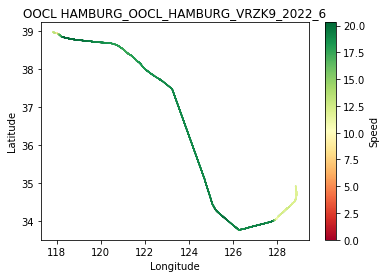

보간법 전 일반 평균 속도 : 16.87608200455581
보간법 전 일반 속도 표준편차: 3.2020180783502483
보간법 전 저속 제거 평균 속도 : 16.87608200455581
보간법 전 저속 제거 속도 표준편차: 3.2020180783502483
-
보간법 후 일반 평균 속도 : 17.54760790317941
보간법 후 일반 속도 표준편차: 2.7269885797240936
보간법 후 저속 제거 평균 속도 : 17.54760790317941
보간법 후 저속 제거 속도 표준편차: 2.7269885797240936


In [13]:
max_speed_list = []
min_speed_list = []
for i in OOCL_HAMBURG_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_HAMBURG_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [14]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_HAMBURG_VRZK9_2022_5']

In [17]:
low_speed_path_data =[]
high_speed_path_data =[]
for i in OOCL_HAMBURG_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [18]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [19]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [20]:
result_df_dict=  {
    "experiment_no" : [],
    "mean_speed" : [],
    "max_speed" : []
}

In [21]:
# 가는 길인데 굳이 오래 돌아갈 필요는 없잖아 알고리즘
def optimal_next_point(current_position, shortest_point_idx, shortest_distance,
                       path_df):
    posi_c = current_position
    latitude_i = path_df.loc[shortest_point_idx, "latitude"]
    longitude_i = path_df.loc[shortest_point_idx, "longitude"]
    posi_i = (latitude_i, longitude_i)
    min_d = shortest_distance
    n = shortest_point_idx + 1
    while True:
        try:
            latitude_n = path_df.loc[n, "latitude"]
            longitude_n = path_df.loc[n, "longitude"]
            posi_n = (latitude_n, longitude_n)
            distance = haversine(posi_c, posi_n, unit="km")
            if n == shortest_point_idx + 1:
                path_distance = haversine(posi_i, posi_n, unit="km")
                paths_distance = path_distance
            else:
                path_distance = haversine(posi_n, posi_previous_n, unit="km")
                paths_distance += path_distance

            if distance < (paths_distance + min_d):
                optimal_next_point_idx = n
                return optimal_next_point_idx
            elif n == path_df.index[-1]:
                print("no better optimal_point")
                return shortest_point_idx + 1
            else:
                n = n + 1
                posi_previous_n = posi_n
        except:
            print("no better optimal_point")
            return shortest_point_idx + 1

In [20]:
# 인덱스 번호를 가지고 항로의 segment 번호를 찾음
# 만약 segment의 마지막 번호라면 seg_no를 하나 더한다.

def find_segment_no(optimal_point_idx, path_df, the_number_of_segment):
    seg_no = optimal_point_idx // (len(path_df) / the_number_of_segment)
    next_no = (optimal_point_idx + 1) // (len(path_df) / the_number_of_segment)
    if seg_no != next_no:
        return int(next_no)
    else:
        return int(seg_no)

In [21]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [22]:
def cal_duration(speed, distance):
    if speed ==0:
        speed = 0.1
    hour = int(distance // speed)
    minute = int(
        (distance / speed - hour) * 60)
    second = ((distance / speed - hour) * 60 - minute) * 60
    duration = datetime.timedelta(hours=hour,minutes=minute, seconds=second)
    return duration

# ETA 실험 (interpolation 10000), OOCL_GENOA 5항차

In [23]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.671903e+09,117.817600,38.966100,11.850000
1,1.671903e+09,117.819359,38.965803,11.932905
2,1.671903e+09,117.821117,38.965506,12.015810
3,1.671903e+09,117.822876,38.965210,12.098715
4,1.671903e+09,117.824635,38.964913,12.181619
...,...,...,...,...
9995,1.672110e+09,128.842010,34.927469,10.385443
9996,1.672110e+09,128.841333,34.928390,10.364082
9997,1.672110e+09,128.840655,34.929310,10.342721
9998,1.672110e+09,128.839978,34.930230,10.321361


In [24]:
# low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
# low_speed_interpolated_df

In [25]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [26]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [27]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [28]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

12.603994017849754
11.441347044256823
11.790634127610597
12.712668350506442
12.762453754677363
12.521947697174948
12.54384261419204
12.800977389115971
12.928653629376
12.97557748211017
13.00109925167073
13.008058430782937
13.015017609894253
13.021976789006192
12.831910784742849
12.663647427617555
12.70300078460534
12.777438372067193
12.811147171954238
12.80816056549906
12.743488482221242
12.658295563811352
12.719631704372985
12.752242563322408
12.707686249423377
12.7024953833813
12.78214091004727
13.300969627143584
14.275275947711632
14.24457599376289
14.20352497242587
14.210820832648139
14.218105514719305
14.225390196790547
14.23267487886167
14.239959560932796
14.247878031306769
14.27622468630184
14.218623539711691
14.399755395749295
14.336910588788191
14.28739279146618
14.3
14.3
14.299994072718146
14.297054504160483
14.291669837108234
14.286285170055978
14.280900503003789
14.23500238066436
14.058946542010267
13.87306273342994
13.687178924850286
13.53804116958495
13.554203792486062
13

### segment로 평균 속도 적용 ETA 계산

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [29]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터

    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df, the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [30]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 03:41:17.175400
평균: 1 days 00:16:57.509279321


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [31]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [32]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [33]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 03:41:17.175400
평균: 1 days 00:16:57.509279321


In [34]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
264,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8764,34.7688,9.8,355.0,2022-12-22 10:26:02.417316,2022-12-22 01:23:21.000000,2022-12-22 01:20:16,under way using engine,22.924498,2.294621,2022-12-22 10:26:02.417316,2022-12-22 11:31:12.768951,0 days 01:05:10.351635
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 10:21:01.727306,2022-12-22 11:31:12.768951,0 days 01:10:11.041645
262,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8703,34.7252,10.2,358.0,2022-12-22 10:11:00.096710,2022-12-22 01:08:11.000000,2022-12-22 01:02:13,under way using engine,27.569399,2.740572,2022-12-22 10:11:00.096710,2022-12-22 11:31:12.768951,0 days 01:20:12.672241
261,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8694,34.7095,9.8,359.0,2022-12-22 10:05:58.995472,2022-12-22 01:03:25.000000,2022-12-22 01:02:13,under way using engine,29.278899,2.930663,2022-12-22 10:05:58.995472,2022-12-22 11:31:12.768951,0 days 01:25:13.773479
260,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8672,34.6825,10.4,0.0,2022-12-22 10:00:58.600013,2022-12-22 00:53:00.000000,2022-12-22 12:56:15,under way using engine,32.220268,3.195556,2022-12-22 10:00:58.600013,2022-12-22 11:31:12.768951,0 days 01:30:14.168938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8809,34.8326,9.6,0.0,2022-12-22 10:51:06.264156,2022-12-22 01:47:15.000000,2022-12-22 01:44:15,under way using engine,16.231786,1.632305,NaT,2022-12-22 11:31:12.768951,NaT
269,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8829,34.8519,9.2,338.0,2022-12-22 10:56:07.035287,2022-12-22 01:53:41.000000,2022-12-22 01:44:15,under way using engine,14.309471,1.456182,NaT,2022-12-22 11:31:12.768951,NaT
270,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8625,34.8893,7.8,327.0,2022-12-22 11:11:09.568129,2022-12-22 02:08:52.000000,2022-12-22 02:08:16,under way using engine,9.753411,1.066069,NaT,2022-12-22 11:31:12.768951,NaT
271,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8452,34.9196,9.8,328.0,2022-12-22 11:26:11.623251,2022-12-22 02:24:01.000000,2022-12-22 02:08:16,under way using engine,6.034855,0.604057,NaT,2022-12-22 11:31:12.768951,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [35]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [36]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [37]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:48:22.657902
평균: 0 days 01:48:54.344079261


In [38]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
117,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.9352,34.7788,12.9,157.0,2022-12-21 15:08:04.738691,2022-12-21 06:07:52.000000,2022-12-20 11:56:16,under way using engine,354.954645,36.116129,2022-12-22 11:31:17.903434,2022-12-22 11:31:12.768951,0 days 00:00:05.134483
218,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.8602,34.0828,13.9,39.0,2022-12-22 05:05:13.406655,2022-12-21 20:04:26.000000,2022-12-21 03:44:15,under way using engine,132.081072,13.881003,2022-12-22 11:31:03.512846,2022-12-22 11:31:12.768951,0 days 00:00:09.256105
229,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.0689,34.1974,13.7,63.0,2022-12-22 06:00:21.843742,2022-12-21 20:59:21.000000,2022-12-21 03:44:15,under way using engine,109.971412,11.473793,2022-12-22 11:31:25.699074,2022-12-22 11:31:12.768951,0 days 00:00:12.930123
192,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.3716,33.8507,13.7,81.0,2022-12-22 02:54:53.259812,2022-12-21 17:54:26.000000,2022-12-21 03:44:15,under way using engine,181.987443,18.987538,2022-12-22 11:31:59.342969,2022-12-22 11:31:12.768951,0 days 00:00:46.574018
180,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.0738,33.8118,14.1,78.0,2022-12-22 01:49:43.225386,2022-12-21 16:48:42.000000,2022-12-21 03:44:15,under way using engine,205.496692,21.761756,2022-12-22 11:32:00.230712,2022-12-22 11:31:12.768951,0 days 00:00:47.461761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-22 03:57:52.470893,2022-12-22 11:31:12.768951,0 days 07:33:20.298058
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 03:56:36.600543,2022-12-22 11:31:12.768951,0 days 07:34:36.168408
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 03:51:54.736450,2022-12-22 11:31:12.768951,0 days 07:39:18.032501
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 03:47:51.477342,2022-12-22 11:31:12.768951,0 days 07:43:21.291609


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [39]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [40]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [41]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 17:12:19.971938
평균: 0 days 05:05:15.802399932


In [42]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
261,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8694,34.7095,9.8,359.0,2022-12-22 10:05:58.995472,2022-12-22 01:03:25.000000,2022-12-22 01:02:13,under way using engine,29.278899,2.930663,2022-12-22 11:29:57.782214,2022-12-22 11:31:12.768951,0 days 00:01:14.986737
173,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220500,126.3402,33.7694,13.7,87.0,2022-12-21 23:09:19.232118,2022-12-21 14:07:41.000000,2022-12-21 01:50:14,under way using engine,263.785325,27.521865,2022-12-22 11:29:55.561703,2022-12-22 11:31:12.768951,0 days 00:01:17.207248
163,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,126.0185,33.8751,13.6,119.0,2022-12-21 21:49:05.708937,2022-12-21 12:48:52.000000,2022-12-20 11:56:16,under way using engine,284.266838,29.555458,2022-12-22 11:33:06.926974,2022-12-22 11:31:12.768951,0 days 00:01:54.158023
231,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.1119,34.2145,13.7,62.0,2022-12-22 06:10:23.503624,2022-12-21 21:09:39.000000,2022-12-21 03:44:15,under way using engine,106.040074,11.063620,2022-12-22 11:28:56.056406,2022-12-22 11:31:12.768951,0 days 00:02:16.712545
172,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,126.2345,33.7726,13.7,98.0,2022-12-21 22:45:36.362210,2022-12-21 13:44:31.000000,2022-12-20 11:56:16,under way using engine,272.018519,28.380870,2022-12-22 11:33:58.688989,2022-12-22 11:31:12.768951,0 days 00:02:45.920038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.5983,38.7992,9.3,96.0,2022-12-20 01:42:21.453938,2022-12-19 16:38:57.000000,2022-12-19 04:32:15,under way using engine,1003.048416,101.737740,2022-12-21 18:53:07.382332,2022-12-22 11:31:12.768951,0 days 16:38:05.386619
31,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.7530,38.7816,9.7,101.0,2022-12-20 02:22:27.723731,2022-12-19 17:20:24.000000,2022-12-19 04:32:15,under way using engine,989.889537,99.303558,2022-12-21 18:41:04.524498,2022-12-22 11:31:12.768951,0 days 16:50:08.244453
30,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.7378,38.7839,9.7,101.0,2022-12-20 02:17:26.340396,2022-12-19 17:13:12.000000,2022-12-19 04:32:15,under way using engine,991.205884,99.435611,2022-12-21 18:38:59.829352,2022-12-22 11:31:12.768951,0 days 16:52:12.939599
26,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.6574,38.7937,9.5,96.0,2022-12-20 01:37:20.687046,2022-12-19 16:36:55.000000,2022-12-19 04:32:15,under way using engine,998.070961,100.633975,2022-12-21 18:20:20.351578,2022-12-22 11:31:12.768951,0 days 17:10:52.417373


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [43]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [44]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
    if real_speed < 7 * 1.852:
        continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = real_speed / d_speed
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [45]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 3 days 23:24:01.301232
평균: 1 days 01:15:15.572844836


In [46]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
251,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.7610,34.4781,13.4,70.0,2022-12-22 08:45:47.859056,2022-12-21 23:44:56.000000,2022-12-21 11:44:13,under way using engine,54.912821,5.671268,2022-12-22 11:31:13.558050,2022-12-22 11:31:12.768951,0 days 00:00:00.789099
258,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8609,34.6377,10.4,0.0,2022-12-22 09:40:55.895470,2022-12-22 00:37:50.000000,2022-12-22 12:32:15,under way using engine,37.099184,3.679440,2022-12-22 11:32:11.414534,2022-12-22 11:31:12.768951,0 days 00:00:58.645583
254,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8230,34.5390,13.2,10.0,2022-12-22 09:10:50.880636,2022-12-22 00:07:44.000000,2022-12-22 12:08:13,under way using engine,47.881700,4.914125,2022-12-22 11:32:37.833822,2022-12-22 11:31:12.768951,0 days 00:01:25.064871
262,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8703,34.7252,10.2,358.0,2022-12-22 10:11:00.096710,2022-12-22 01:08:11.000000,2022-12-22 01:02:13,under way using engine,27.569399,2.740572,2022-12-22 11:29:38.543115,2022-12-22 11:31:12.768951,0 days 00:01:34.225836
256,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8472,34.5986,12.9,20.0,2022-12-22 09:25:52.866027,2022-12-22 00:25:26.000000,2022-12-22 12:08:13,under way using engine,41.331144,4.205385,2022-12-22 11:28:54.704123,2022-12-22 11:31:12.768951,0 days 00:02:18.064828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9549,38.9468,13.3,102.0,2022-12-19 21:56:46.998770,2022-12-19 12:53:37.000000,2022-12-19 12:32:17,under way using engine,1060.876311,109.215401,2022-12-25 16:10:13.444928,2022-12-22 11:31:12.768951,3 days 04:39:00.675977
7,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0600,38.9242,6.6,118.0,2022-12-19 22:26:51.560222,2022-12-19 13:23:58.000000,2022-12-19 01:08:15,under way using engine,1051.494428,127.628908,2022-12-25 21:39:56.931790,2022-12-22 11:31:12.768951,3 days 10:08:44.162839
12,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1992,38.8509,9.3,124.0,2022-12-19 23:16:59.160582,2022-12-19 14:15:32.000000,2022-12-19 02:08:15,under way using engine,1037.306172,105.212454,2022-12-25 22:39:50.549134,2022-12-22 11:31:12.768951,3 days 11:08:37.780183
17,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.3816,38.8272,10.0,106.0,2022-12-20 00:17:08.395476,2022-12-19 15:11:35.000000,2022-12-19 03:08:16,under way using engine,1021.638775,101.868236,2022-12-26 05:45:18.922441,2022-12-22 11:31:12.768951,3 days 18:14:06.153490


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [47]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [48]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
    if real_speed < 7 * 1.852:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = 1
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [49]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 05:11:52.511887
평균: 0 days 22:51:02.352663081


In [50]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
262,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8703,34.7252,10.2,358.0,2022-12-22 10:11:00.096710,2022-12-22 01:08:11.000000,2022-12-22 01:02:13,under way using engine,27.569399,2.740572,2022-12-22 11:34:49.859139,2022-12-22 11:31:12.768951,0 days 00:03:37.090188
261,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8694,34.7095,9.8,359.0,2022-12-22 10:05:58.995472,2022-12-22 01:03:25.000000,2022-12-22 01:02:13,under way using engine,29.278899,2.930663,2022-12-22 11:34:49.859139,2022-12-22 11:31:12.768951,0 days 00:03:37.090188
260,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8672,34.6825,10.4,0.0,2022-12-22 10:00:58.600013,2022-12-22 00:53:00.000000,2022-12-22 12:56:15,under way using engine,32.220268,3.195556,2022-12-22 11:34:49.859139,2022-12-22 11:31:12.768951,0 days 00:03:37.090188
259,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8640,34.6607,10.9,3.0,2022-12-22 09:50:56.934884,2022-12-22 00:46:33.000000,2022-12-22 12:50:13,under way using engine,34.588099,3.421581,2022-12-22 11:34:49.859139,2022-12-22 11:31:12.768951,0 days 00:03:37.090188
258,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8609,34.6377,10.4,0.0,2022-12-22 09:40:55.895470,2022-12-22 00:37:50.000000,2022-12-22 12:32:15,under way using engine,37.099184,3.679440,2022-12-22 11:34:49.859139,2022-12-22 11:31:12.768951,0 days 00:03:37.090188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-24 16:10:47.667304,2022-12-22 11:31:12.768951,2 days 04:39:34.898353
4,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9549,38.9468,13.3,102.0,2022-12-19 21:56:46.998770,2022-12-19 12:53:37.000000,2022-12-19 12:32:17,under way using engine,1060.876311,109.215401,2022-12-24 16:43:05.280838,2022-12-22 11:31:12.768951,2 days 05:11:52.511887
3,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9392,38.9490,13.3,100.0,2022-12-19 21:51:46.473293,2022-12-19 12:51:11.000000,2022-12-19 12:32:17,under way using engine,1062.230335,109.354795,2022-12-24 16:43:05.280838,2022-12-22 11:31:12.768951,2 days 05:11:52.511887
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-24 16:43:05.280838,2022-12-22 11:31:12.768951,2 days 05:11:52.511887


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [51]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [52]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = 1
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
        
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [53]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 28 days 20:34:41.448526
평균: 12 days 09:06:53.681101630


In [54]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
264,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8764,34.7688,9.8,355.0,2022-12-22 10:26:02.417316,2022-12-22 01:23:21.000000,2022-12-22 01:20:16,under way using engine,22.924498,2.294621,2022-12-22 15:17:31.528362,2022-12-22 11:31:12.768951,0 days 03:46:18.759411
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 15:17:31.528362,2022-12-22 11:31:12.768951,0 days 03:46:18.759411
261,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8694,34.7095,9.8,359.0,2022-12-22 10:05:58.995472,2022-12-22 01:03:25.000000,2022-12-22 01:02:13,under way using engine,29.278899,2.930663,2022-12-22 22:23:38.892080,2022-12-22 11:31:12.768951,0 days 10:52:26.123129
257,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8524,34.6083,11.6,21.0,2022-12-22 09:30:53.761895,2022-12-22 00:28:32.000000,2022-12-22 12:26:13,under way using engine,40.287307,3.998886,2022-12-22 22:23:38.892080,2022-12-22 11:31:12.768951,0 days 10:52:26.123129
258,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8609,34.6377,10.4,0.0,2022-12-22 09:40:55.895470,2022-12-22 00:37:50.000000,2022-12-22 12:32:15,under way using engine,37.099184,3.679440,2022-12-22 22:23:38.892080,2022-12-22 11:31:12.768951,0 days 10:52:26.123129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2023-01-20 02:07:25.392188,2022-12-22 11:31:12.768951,28 days 14:36:12.623237
4,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9549,38.9468,13.3,102.0,2022-12-19 21:56:46.998770,2022-12-19 12:53:37.000000,2022-12-19 12:32:17,under way using engine,1060.876311,109.215401,2023-01-20 08:05:54.217477,2022-12-22 11:31:12.768951,28 days 20:34:41.448526
3,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9392,38.9490,13.3,100.0,2022-12-19 21:51:46.473293,2022-12-19 12:51:11.000000,2022-12-19 12:32:17,under way using engine,1062.230335,109.354795,2023-01-20 08:05:54.217477,2022-12-22 11:31:12.768951,28 days 20:34:41.448526
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2023-01-20 08:05:54.217477,2022-12-22 11:31:12.768951,28 days 20:34:41.448526


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [55]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [56]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        speed_damping_ratio = current_speed / next_seg_df["speed"].mean()
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [57]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 08:29:52.637986
평균: 0 days 10:03:05.094546567


In [58]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
262,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8703,34.7252,10.2,358.0,2022-12-22 10:11:00.096710,2022-12-22 01:08:11.000000,2022-12-22 01:02:13,under way using engine,27.569399,2.740572,2022-12-22 10:58:12.358888,2022-12-22 11:31:12.768951,0 days 00:33:00.410063
261,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8694,34.7095,9.8,359.0,2022-12-22 10:05:58.995472,2022-12-22 01:03:25.000000,2022-12-22 01:02:13,under way using engine,29.278899,2.930663,2022-12-22 10:55:06.860181,2022-12-22 11:31:12.768951,0 days 00:36:05.908770
264,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8764,34.7688,9.8,355.0,2022-12-22 10:26:02.417316,2022-12-22 01:23:21.000000,2022-12-22 01:20:16,under way using engine,22.924498,2.294621,2022-12-22 10:50:53.488632,2022-12-22 11:31:12.768951,0 days 00:40:19.280319
260,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8672,34.6825,10.4,0.0,2022-12-22 10:00:58.600013,2022-12-22 00:53:00.000000,2022-12-22 12:56:15,under way using engine,32.220268,3.195556,2022-12-22 10:47:16.395619,2022-12-22 11:31:12.768951,0 days 00:43:56.373332
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 10:43:10.136304,2022-12-22 11:31:12.768951,0 days 00:48:02.632647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8182,38.9657,11.9,103.0,2022-12-19 21:26:42.598823,2022-12-19 12:22:56.000000,2022-12-19 11:32:13,under way using engine,1072.657959,106.868391,2022-12-21 06:09:37.841620,2022-12-22 11:31:12.768951,1 days 05:21:34.927331
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-21 05:52:13.503187,2022-12-22 11:31:12.768951,1 days 05:38:59.265764
4,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9549,38.9468,13.3,102.0,2022-12-19 21:56:46.998770,2022-12-19 12:53:37.000000,2022-12-19 12:32:17,under way using engine,1060.876311,109.215401,2022-12-21 03:13:04.847629,2022-12-22 11:31:12.768951,1 days 08:18:07.921322
3,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9392,38.9490,13.3,100.0,2022-12-19 21:51:46.473293,2022-12-19 12:51:11.000000,2022-12-19 12:32:17,under way using engine,1062.230335,109.354795,2022-12-21 03:08:04.322152,2022-12-22 11:31:12.768951,1 days 08:23:08.446799


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [59]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [60]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        speed_damping_ratio = 1
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [61]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 07:22:53.026987
평균: 0 days 11:43:27.725108714


In [62]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

12220400    172
12220300     91
12220500      1
Name: eta, dtype: int64

In [63]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
262,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8703,34.7252,10.2,358.0,2022-12-22 10:11:00.096710,2022-12-22 01:08:11.000000,2022-12-22 01:02:13,under way using engine,27.569399,2.740572,2022-12-22 10:59:04.743420,2022-12-22 11:31:12.768951,0 days 00:32:08.025531
264,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8764,34.7688,9.8,355.0,2022-12-22 10:26:02.417316,2022-12-22 01:23:21.000000,2022-12-22 01:20:16,under way using engine,22.924498,2.294621,2022-12-22 10:55:23.353034,2022-12-22 11:31:12.768951,0 days 00:35:49.415917
261,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8694,34.7095,9.8,359.0,2022-12-22 10:05:58.995472,2022-12-22 01:03:25.000000,2022-12-22 01:02:13,under way using engine,29.278899,2.930663,2022-12-22 10:54:03.642182,2022-12-22 11:31:12.768951,0 days 00:37:09.126769
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 10:50:22.663024,2022-12-22 11:31:12.768951,0 days 00:40:50.105927
260,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8672,34.6825,10.4,0.0,2022-12-22 10:00:58.600013,2022-12-22 00:53:00.000000,2022-12-22 12:56:15,under way using engine,32.220268,3.195556,2022-12-22 10:49:03.246723,2022-12-22 11:31:12.768951,0 days 00:42:09.522228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9392,38.9490,13.3,100.0,2022-12-19 21:51:46.473293,2022-12-19 12:51:11.000000,2022-12-19 12:32:17,under way using engine,1062.230335,109.354795,2022-12-21 04:33:23.616434,2022-12-22 11:31:12.768951,1 days 06:57:49.152517
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-21 04:32:41.930989,2022-12-22 11:31:12.768951,1 days 06:58:30.837962
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-21 04:23:22.101808,2022-12-22 11:31:12.768951,1 days 07:07:50.667143
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-21 04:13:21.108257,2022-12-22 11:31:12.768951,1 days 07:17:51.660694


### segment 없이

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [64]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [65]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [66]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 22:06:54.043443
평균: 0 days 09:29:58.758148202


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [67]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [68]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [69]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 22:06:54.043443
평균: 0 days 09:29:58.758148202


In [70]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
100,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.7847,35.0474,12.6,163.0,2022-12-21 13:42:50.697302,2022-12-21 04:41:51.000000,2022-12-20 11:56:16,under way using engine,367.546512,37.113633,2022-12-22 11:31:39.013059,2022-12-22 11:31:12.768951,0 days 00:00:26.244108
257,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8524,34.6083,11.6,21.0,2022-12-22 09:30:53.761895,2022-12-22 00:28:32.000000,2022-12-22 12:26:13,under way using engine,40.287307,3.998886,2022-12-22 11:29:36.366330,2022-12-22 11:31:12.768951,0 days 00:01:36.402621
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 11:33:09.373790,2022-12-22 11:31:12.768951,0 days 00:01:56.604839
101,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.7918,35.0300,12.6,155.0,2022-12-21 13:47:52.487718,2022-12-21 04:47:02.000000,2022-12-20 11:56:16,under way using engine,366.898701,37.048219,2022-12-22 11:29:09.931306,2022-12-22 11:31:12.768951,0 days 00:02:02.837645
136,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.0464,34.4668,12.8,154.0,2022-12-21 16:43:22.388751,2022-12-21 07:43:03.000000,2022-12-20 11:56:16,under way using engine,349.330305,35.449634,2022-12-22 11:27:02.667085,2022-12-22 11:31:12.768951,0 days 00:04:10.101866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8809,34.8326,9.6,0.0,2022-12-22 10:51:06.264156,2022-12-22 01:47:15.000000,2022-12-22 01:44:15,under way using engine,16.231786,1.632305,NaT,2022-12-22 11:31:12.768951,NaT
269,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8829,34.8519,9.2,338.0,2022-12-22 10:56:07.035287,2022-12-22 01:53:41.000000,2022-12-22 01:44:15,under way using engine,14.309471,1.456182,NaT,2022-12-22 11:31:12.768951,NaT
270,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8625,34.8893,7.8,327.0,2022-12-22 11:11:09.568129,2022-12-22 02:08:52.000000,2022-12-22 02:08:16,under way using engine,9.753411,1.066069,NaT,2022-12-22 11:31:12.768951,NaT
271,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8452,34.9196,9.8,328.0,2022-12-22 11:26:11.623251,2022-12-22 02:24:01.000000,2022-12-22 02:08:16,under way using engine,6.034855,0.604057,NaT,2022-12-22 11:31:12.768951,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [71]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [72]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
#     # speed_damping_ratio는 각 segment에 맞게
# #     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [73]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 16:11:45.546478
평균: 0 days 03:34:59.970472373


In [74]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
171,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,126.2039,33.7763,13.3,99.0,2022-12-21 22:39:13.298968,2022-12-21 13:37:42.000000,2022-12-20 11:56:16,under way using engine,274.267094,28.235328,2022-12-22 11:30:54.128284,2022-12-22 11:31:12.768951,0 days 00:00:18.640667
111,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.8878,34.8771,12.3,158.0,2022-12-21 14:37:59.429358,2022-12-21 05:37:12.000000,2022-12-20 11:56:16,under way using engine,358.576539,35.972163,2022-12-22 11:31:38.334879,2022-12-22 11:31:12.768951,0 days 00:00:25.565928
264,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8764,34.7688,9.8,355.0,2022-12-22 10:26:02.417316,2022-12-22 01:23:21.000000,2022-12-22 01:20:16,under way using engine,22.924498,2.294621,2022-12-22 11:30:32.448547,2022-12-22 11:31:12.768951,0 days 00:00:40.320404
258,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8609,34.6377,10.4,0.0,2022-12-22 09:40:55.895470,2022-12-22 00:37:50.000000,2022-12-22 12:32:15,under way using engine,37.099184,3.679440,2022-12-22 11:32:06.671788,2022-12-22 11:31:12.768951,0 days 00:00:53.902837
112,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.8964,34.8604,12.3,163.0,2022-12-21 14:43:00.568052,2022-12-21 05:42:32.000000,2022-12-20 11:56:16,under way using engine,357.887479,35.903037,2022-12-22 11:30:12.263696,2022-12-22 11:31:12.768951,0 days 00:01:00.505255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,120.1607,38.5961,9.0,98.0,2022-12-20 09:03:39.091654,2022-12-20 00:01:11.000000,2022-12-19 07:50:13,under way using engine,869.658418,89.145301,2022-12-23 03:00:01.739194,2022-12-22 11:31:12.768951,0 days 15:28:48.970243
38,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,120.3202,38.5852,8.9,97.0,2022-12-20 09:53:35.781375,2022-12-20 00:51:16.000000,2022-12-19 07:50:13,under way using engine,856.596517,88.156692,2022-12-23 03:40:24.674181,2022-12-22 11:31:12.768951,0 days 16:09:11.905230
35,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,120.2284,38.5911,8.9,98.0,2022-12-20 09:23:30.888641,2022-12-20 00:22:52.000000,2022-12-19 07:50:13,under way using engine,864.092618,88.928154,2022-12-23 03:40:55.149323,2022-12-22 11:31:12.768951,0 days 16:09:42.380372
36,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,120.2701,38.5883,8.9,97.0,2022-12-20 09:38:33.756138,2022-12-20 00:35:18.000000,2022-12-19 07:50:13,under way using engine,860.680433,88.576989,2022-12-23 03:42:00.318457,2022-12-22 11:31:12.768951,0 days 16:10:47.549506


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [75]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [76]:
speed_list = []

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
#     # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [77]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 06:09:39.091768
평균: 0 days 06:22:20.432157119


In [78]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 11:29:52.073829,2022-12-22 11:31:12.768951,0 days 00:01:20.695122
66,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,121.2475,38.4028,10.9,124.0,2022-12-20 14:44:20.157801,2022-12-20 05:42:36.000000,2022-12-20 05:08:15,under way using engine,775.250760,76.690630,2022-12-22 11:25:58.784509,2022-12-22 11:31:12.768951,0 days 00:05:13.984442
257,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8524,34.6083,11.6,21.0,2022-12-22 09:30:53.761895,2022-12-22 00:28:32.000000,2022-12-22 12:26:13,under way using engine,40.287307,3.998886,2022-12-22 11:24:43.200449,2022-12-22 11:31:12.768951,0 days 00:06:29.568502
147,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.1711,34.2855,12.0,130.0,2022-12-21 17:43:28.361708,2022-12-21 08:43:12.000000,2022-12-20 11:56:16,under way using engine,342.352874,34.160444,2022-12-22 11:37:45.248665,2022-12-22 11:31:12.768951,0 days 00:06:32.479714
202,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.5909,33.8818,12.5,46.0,2022-12-22 03:45:01.334180,2022-12-21 18:44:36.000000,2022-12-21 03:44:15,under way using engine,165.309524,16.654046,2022-12-22 11:24:11.299553,2022-12-22 11:31:12.768951,0 days 00:07:01.469398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-23 13:52:17.139133,2022-12-22 11:31:12.768951,1 days 02:21:04.370182
14,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.2620,38.8363,9.2,96.0,2022-12-19 23:37:02.524310,2022-12-19 14:35:50.000000,2022-12-19 02:32:15,under way using engine,1031.649416,104.984232,2022-12-23 15:08:30.537319,2022-12-22 11:31:12.768951,1 days 03:37:17.768368
12,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1992,38.8509,9.3,124.0,2022-12-19 23:16:59.160582,2022-12-19 14:15:32.000000,2022-12-19 02:08:15,under way using engine,1037.306172,105.212454,2022-12-23 15:14:36.414444,2022-12-22 11:31:12.768951,1 days 03:43:23.645493
15,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.2800,38.8346,9.1,93.0,2022-12-19 23:42:03.885026,2022-12-19 14:40:37.000000,2022-12-19 02:32:15,under way using engine,1030.128732,105.199281,2022-12-23 16:06:10.674969,2022-12-22 11:31:12.768951,1 days 04:34:57.906018


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [79]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [80]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / whole_mean_speed
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [81]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 7 days 06:14:02.531873
평균: 1 days 07:34:02.165643669


In [82]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
254,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8230,34.5390,13.2,10.0,2022-12-22 09:10:50.880636,2022-12-22 00:07:44.000000,2022-12-22 12:08:13,under way using engine,47.881700,4.914125,2022-12-22 11:35:50.782610,2022-12-22 11:31:12.768951,0 days 00:04:38.013659
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 11:41:30.424231,2022-12-22 11:31:12.768951,0 days 00:10:17.655280
251,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.7610,34.4781,13.4,70.0,2022-12-22 08:45:47.859056,2022-12-21 23:44:56.000000,2022-12-21 11:44:13,under way using engine,54.912821,5.671268,2022-12-22 11:41:49.021909,2022-12-22 11:31:12.768951,0 days 00:10:36.252958
253,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8175,34.5152,12.6,10.0,2022-12-22 09:05:50.794832,2022-12-22 00:01:48.000000,2022-12-21 11:44:13,under way using engine,50.527359,5.102086,2022-12-22 11:18:15.546366,2022-12-22 11:31:12.768951,0 days 00:12:57.222585
264,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8764,34.7688,9.8,355.0,2022-12-22 10:26:02.417316,2022-12-22 01:23:21.000000,2022-12-22 01:20:16,under way using engine,22.924498,2.294621,2022-12-22 11:45:40.481375,2022-12-22 11:31:12.768951,0 days 00:14:27.712424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,120.2971,38.5866,8.9,97.0,2022-12-20 09:48:35.712284,2022-12-20 00:44:52.000000,2022-12-19 07:50:13,under way using engine,858.477696,88.350294,2022-12-27 20:27:52.048599,2022-12-22 11:31:12.768951,5 days 08:56:39.279648
7,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0600,38.9242,6.6,118.0,2022-12-19 22:26:51.560222,2022-12-19 13:23:58.000000,2022-12-19 01:08:15,under way using engine,1051.494428,127.628908,2022-12-27 21:06:54.707622,2022-12-22 11:31:12.768951,5 days 09:35:41.938671
12,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1992,38.8509,9.3,124.0,2022-12-19 23:16:59.160582,2022-12-19 14:15:32.000000,2022-12-19 02:08:15,under way using engine,1037.306172,105.212454,2022-12-28 01:27:01.761340,2022-12-22 11:31:12.768951,5 days 13:55:48.992389
17,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.3816,38.8272,10.0,106.0,2022-12-20 00:17:08.395476,2022-12-19 15:11:35.000000,2022-12-19 03:08:16,under way using engine,1021.638775,101.868236,2022-12-29 05:42:30.515891,2022-12-22 11:31:12.768951,6 days 18:11:17.746940


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [83]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [84]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [85]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 4 days 00:26:07.683693
평균: 1 days 02:04:34.765666909


In [86]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 11:29:48.815669,2022-12-22 11:31:12.768951,0 days 00:01:23.953282
264,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8764,34.7688,9.8,355.0,2022-12-22 10:26:02.417316,2022-12-22 01:23:21.000000,2022-12-22 01:20:16,under way using engine,22.924498,2.294621,2022-12-22 11:28:59.152240,2022-12-22 11:31:12.768951,0 days 00:02:13.616711
256,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8472,34.5986,12.9,20.0,2022-12-22 09:25:52.866027,2022-12-22 00:25:26.000000,2022-12-22 12:08:13,under way using engine,41.331144,4.205385,2022-12-22 11:36:14.654678,2022-12-22 11:31:12.768951,0 days 00:05:01.885727
262,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8703,34.7252,10.2,358.0,2022-12-22 10:11:00.096710,2022-12-22 01:08:11.000000,2022-12-22 01:02:13,under way using engine,27.569399,2.740572,2022-12-22 11:37:17.555448,2022-12-22 11:31:12.768951,0 days 00:06:04.786497
253,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8175,34.5152,12.6,10.0,2022-12-22 09:05:50.794832,2022-12-22 00:01:48.000000,2022-12-21 11:44:13,under way using engine,50.527359,5.102086,2022-12-22 11:46:15.065458,2022-12-22 11:31:12.768951,0 days 00:15:02.296507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9549,38.9468,13.3,102.0,2022-12-19 21:56:46.998770,2022-12-19 12:53:37.000000,2022-12-19 12:32:17,under way using engine,1060.876311,109.215401,2022-12-25 17:01:33.737526,2022-12-22 11:31:12.768951,3 days 05:30:20.968575
7,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0600,38.9242,6.6,118.0,2022-12-19 22:26:51.560222,2022-12-19 13:23:58.000000,2022-12-19 01:08:15,under way using engine,1051.494428,127.628908,2022-12-25 22:41:34.997123,2022-12-22 11:31:12.768951,3 days 11:10:22.228172
12,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1992,38.8509,9.3,124.0,2022-12-19 23:16:59.160582,2022-12-19 14:15:32.000000,2022-12-19 02:08:15,under way using engine,1037.306172,105.212454,2022-12-25 23:36:46.722410,2022-12-22 11:31:12.768951,3 days 12:05:33.953459
17,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.3816,38.8272,10.0,106.0,2022-12-20 00:17:08.395476,2022-12-19 15:11:35.000000,2022-12-19 03:08:16,under way using engine,1021.638775,101.868236,2022-12-26 07:29:42.092963,2022-12-22 11:31:12.768951,3 days 19:58:29.324012


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [87]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [88]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = low_speed_df_list[next_seg_no]
        
#         seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
#         damped_mean_speed = 1
#         km_h = damped_mean_speed * 1.852
#         distance = reckon_point_lengths(next_seg_df)
# #         dura_list.append(cal_duration(km_h, distance))
        
    
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [89]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 4 days 00:26:07.683693
평균: 1 days 02:04:34.765666909


In [90]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 11:29:48.815669,2022-12-22 11:31:12.768951,0 days 00:01:23.953282
264,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8764,34.7688,9.8,355.0,2022-12-22 10:26:02.417316,2022-12-22 01:23:21.000000,2022-12-22 01:20:16,under way using engine,22.924498,2.294621,2022-12-22 11:28:59.152240,2022-12-22 11:31:12.768951,0 days 00:02:13.616711
256,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8472,34.5986,12.9,20.0,2022-12-22 09:25:52.866027,2022-12-22 00:25:26.000000,2022-12-22 12:08:13,under way using engine,41.331144,4.205385,2022-12-22 11:36:14.654678,2022-12-22 11:31:12.768951,0 days 00:05:01.885727
262,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8703,34.7252,10.2,358.0,2022-12-22 10:11:00.096710,2022-12-22 01:08:11.000000,2022-12-22 01:02:13,under way using engine,27.569399,2.740572,2022-12-22 11:37:17.555448,2022-12-22 11:31:12.768951,0 days 00:06:04.786497
253,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8175,34.5152,12.6,10.0,2022-12-22 09:05:50.794832,2022-12-22 00:01:48.000000,2022-12-21 11:44:13,under way using engine,50.527359,5.102086,2022-12-22 11:46:15.065458,2022-12-22 11:31:12.768951,0 days 00:15:02.296507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9549,38.9468,13.3,102.0,2022-12-19 21:56:46.998770,2022-12-19 12:53:37.000000,2022-12-19 12:32:17,under way using engine,1060.876311,109.215401,2022-12-25 17:01:33.737526,2022-12-22 11:31:12.768951,3 days 05:30:20.968575
7,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0600,38.9242,6.6,118.0,2022-12-19 22:26:51.560222,2022-12-19 13:23:58.000000,2022-12-19 01:08:15,under way using engine,1051.494428,127.628908,2022-12-25 22:41:34.997123,2022-12-22 11:31:12.768951,3 days 11:10:22.228172
12,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1992,38.8509,9.3,124.0,2022-12-19 23:16:59.160582,2022-12-19 14:15:32.000000,2022-12-19 02:08:15,under way using engine,1037.306172,105.212454,2022-12-25 23:36:46.722410,2022-12-22 11:31:12.768951,3 days 12:05:33.953459
17,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.3816,38.8272,10.0,106.0,2022-12-20 00:17:08.395476,2022-12-19 15:11:35.000000,2022-12-19 03:08:16,under way using engine,1021.638775,101.868236,2022-12-26 07:29:42.092963,2022-12-22 11:31:12.768951,3 days 19:58:29.324012


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [91]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [92]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    

    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [93]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 06:09:39.091768
평균: 0 days 06:22:20.432157119


In [94]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 11:29:52.073829,2022-12-22 11:31:12.768951,0 days 00:01:20.695122
66,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,121.2475,38.4028,10.9,124.0,2022-12-20 14:44:20.157801,2022-12-20 05:42:36.000000,2022-12-20 05:08:15,under way using engine,775.250760,76.690630,2022-12-22 11:25:58.784509,2022-12-22 11:31:12.768951,0 days 00:05:13.984442
257,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8524,34.6083,11.6,21.0,2022-12-22 09:30:53.761895,2022-12-22 00:28:32.000000,2022-12-22 12:26:13,under way using engine,40.287307,3.998886,2022-12-22 11:24:43.200449,2022-12-22 11:31:12.768951,0 days 00:06:29.568502
147,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.1711,34.2855,12.0,130.0,2022-12-21 17:43:28.361708,2022-12-21 08:43:12.000000,2022-12-20 11:56:16,under way using engine,342.352874,34.160444,2022-12-22 11:37:45.248665,2022-12-22 11:31:12.768951,0 days 00:06:32.479714
202,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.5909,33.8818,12.5,46.0,2022-12-22 03:45:01.334180,2022-12-21 18:44:36.000000,2022-12-21 03:44:15,under way using engine,165.309524,16.654046,2022-12-22 11:24:11.299553,2022-12-22 11:31:12.768951,0 days 00:07:01.469398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-23 13:52:17.139133,2022-12-22 11:31:12.768951,1 days 02:21:04.370182
14,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.2620,38.8363,9.2,96.0,2022-12-19 23:37:02.524310,2022-12-19 14:35:50.000000,2022-12-19 02:32:15,under way using engine,1031.649416,104.984232,2022-12-23 15:08:30.537319,2022-12-22 11:31:12.768951,1 days 03:37:17.768368
12,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1992,38.8509,9.3,124.0,2022-12-19 23:16:59.160582,2022-12-19 14:15:32.000000,2022-12-19 02:08:15,under way using engine,1037.306172,105.212454,2022-12-23 15:14:36.414444,2022-12-22 11:31:12.768951,1 days 03:43:23.645493
15,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.2800,38.8346,9.1,93.0,2022-12-19 23:42:03.885026,2022-12-19 14:40:37.000000,2022-12-19 02:32:15,under way using engine,1030.128732,105.199281,2022-12-23 16:06:10.674969,2022-12-22 11:31:12.768951,1 days 04:34:57.906018


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [95]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [96]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = low_speed_df_list[next_seg_no]
#         speed_damping_ratio = 1
        
#         for iiii in next_seg_df.index:
#             if iiii != 0:
#                 d_speed = next_seg_df.loc[iiii, "speed"] 
#                 km_h = d_speed * 1.852 * speed_damping_ratio
#                 distance = haversine(current_coord, previous_current_coord, unit="km")
#                 dura_list.append(cal_duration(km_h, distance))
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [97]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 16:11:45.546478
평균: 0 days 03:34:59.970472373


In [98]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

12220400    172
12220300     91
12220500      1
Name: eta, dtype: int64

In [99]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
171,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,126.2039,33.7763,13.3,99.0,2022-12-21 22:39:13.298968,2022-12-21 13:37:42.000000,2022-12-20 11:56:16,under way using engine,274.267094,28.235328,2022-12-22 11:30:54.128284,2022-12-22 11:31:12.768951,0 days 00:00:18.640667
111,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.8878,34.8771,12.3,158.0,2022-12-21 14:37:59.429358,2022-12-21 05:37:12.000000,2022-12-20 11:56:16,under way using engine,358.576539,35.972163,2022-12-22 11:31:38.334879,2022-12-22 11:31:12.768951,0 days 00:00:25.565928
264,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8764,34.7688,9.8,355.0,2022-12-22 10:26:02.417316,2022-12-22 01:23:21.000000,2022-12-22 01:20:16,under way using engine,22.924498,2.294621,2022-12-22 11:30:32.448547,2022-12-22 11:31:12.768951,0 days 00:00:40.320404
258,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8609,34.6377,10.4,0.0,2022-12-22 09:40:55.895470,2022-12-22 00:37:50.000000,2022-12-22 12:32:15,under way using engine,37.099184,3.679440,2022-12-22 11:32:06.671788,2022-12-22 11:31:12.768951,0 days 00:00:53.902837
112,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.8964,34.8604,12.3,163.0,2022-12-21 14:43:00.568052,2022-12-21 05:42:32.000000,2022-12-20 11:56:16,under way using engine,357.887479,35.903037,2022-12-22 11:30:12.263696,2022-12-22 11:31:12.768951,0 days 00:01:00.505255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,120.1607,38.5961,9.0,98.0,2022-12-20 09:03:39.091654,2022-12-20 00:01:11.000000,2022-12-19 07:50:13,under way using engine,869.658418,89.145301,2022-12-23 03:00:01.739194,2022-12-22 11:31:12.768951,0 days 15:28:48.970243
38,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,120.3202,38.5852,8.9,97.0,2022-12-20 09:53:35.781375,2022-12-20 00:51:16.000000,2022-12-19 07:50:13,under way using engine,856.596517,88.156692,2022-12-23 03:40:24.674181,2022-12-22 11:31:12.768951,0 days 16:09:11.905230
35,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,120.2284,38.5911,8.9,98.0,2022-12-20 09:23:30.888641,2022-12-20 00:22:52.000000,2022-12-19 07:50:13,under way using engine,864.092618,88.928154,2022-12-23 03:40:55.149323,2022-12-22 11:31:12.768951,0 days 16:09:42.380372
36,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,120.2701,38.5883,8.9,97.0,2022-12-20 09:38:33.756138,2022-12-20 00:35:18.000000,2022-12-19 07:50:13,under way using engine,860.680433,88.576989,2022-12-23 03:42:00.318457,2022-12-22 11:31:12.768951,0 days 16:10:47.549506


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [100]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [101]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [102]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 19:07:22.272310
평균: 0 days 03:50:25.358672300


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [103]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [104]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [105]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 19:07:22.272310
평균: 0 days 03:50:25.358672300


In [106]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
132,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.0091,34.5313,12.1,159.0,2022-12-21 16:23:17.301683,2022-12-21 07:22:32.000000,2022-12-20 11:56:16,under way using engine,351.495767,35.130989,2022-12-22 11:24:20.857970,2022-12-22 11:31:12.768951,0 days 00:06:51.910981
146,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.1561,34.2978,12.2,131.0,2022-12-21 17:38:26.980394,2022-12-21 08:38:01.000000,2022-12-20 11:56:16,under way using engine,343.366728,34.380110,2022-12-22 11:23:16.244325,2022-12-22 11:31:12.768951,0 days 00:07:56.524626
262,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8703,34.7252,10.2,358.0,2022-12-22 10:11:00.096710,2022-12-22 01:08:11.000000,2022-12-22 01:02:13,under way using engine,27.569399,2.740572,2022-12-22 11:21:21.319726,2022-12-22 11:31:12.768951,0 days 00:09:51.449225
126,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.0074,34.6329,12.2,171.0,2022-12-21 15:53:12.743188,2022-12-21 06:52:51.000000,2022-12-20 11:56:16,under way using engine,350.050206,35.049303,2022-12-22 11:20:49.927399,2022-12-22 11:31:12.768951,0 days 00:10:22.841552
261,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8694,34.7095,9.8,359.0,2022-12-22 10:05:58.995472,2022-12-22 01:03:25.000000,2022-12-22 01:02:13,under way using engine,29.278899,2.930663,2022-12-22 11:19:12.513305,2022-12-22 11:31:12.768951,0 days 00:12:00.255646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8809,34.8326,9.6,0.0,2022-12-22 10:51:06.264156,2022-12-22 01:47:15.000000,2022-12-22 01:44:15,under way using engine,16.231786,1.632305,NaT,2022-12-22 11:31:12.768951,NaT
269,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8829,34.8519,9.2,338.0,2022-12-22 10:56:07.035287,2022-12-22 01:53:41.000000,2022-12-22 01:44:15,under way using engine,14.309471,1.456182,NaT,2022-12-22 11:31:12.768951,NaT
270,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8625,34.8893,7.8,327.0,2022-12-22 11:11:09.568129,2022-12-22 02:08:52.000000,2022-12-22 02:08:16,under way using engine,9.753411,1.066069,NaT,2022-12-22 11:31:12.768951,NaT
271,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8452,34.9196,9.8,328.0,2022-12-22 11:26:11.623251,2022-12-22 02:24:01.000000,2022-12-22 02:08:16,under way using engine,6.034855,0.604057,NaT,2022-12-22 11:31:12.768951,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [107]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [108]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [109]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:48:22.657902
평균: 0 days 01:50:12.760178616


In [110]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
117,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.9352,34.7788,12.9,157.0,2022-12-21 15:08:04.738691,2022-12-21 06:07:52.000000,2022-12-20 11:56:16,under way using engine,354.954645,36.116129,2022-12-22 11:31:17.903434,2022-12-22 11:31:12.768951,0 days 00:00:05.134483
218,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.8602,34.0828,13.9,39.0,2022-12-22 05:05:13.406655,2022-12-21 20:04:26.000000,2022-12-21 03:44:15,under way using engine,132.081072,13.881003,2022-12-22 11:31:03.512846,2022-12-22 11:31:12.768951,0 days 00:00:09.256105
229,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.0689,34.1974,13.7,63.0,2022-12-22 06:00:21.843742,2022-12-21 20:59:21.000000,2022-12-21 03:44:15,under way using engine,109.971412,11.473793,2022-12-22 11:31:25.699074,2022-12-22 11:31:12.768951,0 days 00:00:12.930123
192,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.3716,33.8507,13.7,81.0,2022-12-22 02:54:53.259812,2022-12-21 17:54:26.000000,2022-12-21 03:44:15,under way using engine,181.987443,18.987538,2022-12-22 11:31:59.342969,2022-12-22 11:31:12.768951,0 days 00:00:46.574018
180,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.0738,33.8118,14.1,78.0,2022-12-22 01:49:43.225386,2022-12-21 16:48:42.000000,2022-12-21 03:44:15,under way using engine,205.496692,21.761756,2022-12-22 11:32:00.230712,2022-12-22 11:31:12.768951,0 days 00:00:47.461761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-22 03:57:52.470893,2022-12-22 11:31:12.768951,0 days 07:33:20.298058
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-22 03:56:36.600543,2022-12-22 11:31:12.768951,0 days 07:34:36.168408
9,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1050,38.9063,9.6,119.0,2022-12-19 22:41:53.580386,2022-12-19 13:39:18.000000,2022-12-19 01:08:15,under way using engine,1047.143357,105.303076,2022-12-22 03:51:54.736450,2022-12-22 11:31:12.768951,0 days 07:39:18.032501
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-22 03:47:51.477342,2022-12-22 11:31:12.768951,0 days 07:43:21.291609


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [111]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [112]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [113]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 17:42:37.862663
평균: 0 days 05:15:54.418692699


In [114]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
163,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,126.0185,33.8751,13.6,119.0,2022-12-21 21:49:05.708937,2022-12-21 12:48:52.000000,2022-12-20 11:56:16,under way using engine,284.266838,29.555458,2022-12-22 11:30:59.748016,2022-12-22 11:31:12.768951,0 days 00:00:13.020935
154,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.8185,33.9651,13.4,117.0,2022-12-21 20:58:58.581590,2022-12-21 11:58:31.000000,2022-12-20 11:56:16,under way using engine,296.903592,30.663512,2022-12-22 11:31:50.061916,2022-12-22 11:31:12.768951,0 days 00:00:37.292965
172,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,126.2345,33.7726,13.7,98.0,2022-12-21 22:45:36.362210,2022-12-21 13:44:31.000000,2022-12-20 11:56:16,under way using engine,272.018519,28.380870,2022-12-22 11:32:04.718085,2022-12-22 11:31:12.768951,0 days 00:00:51.949134
159,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.9187,33.9200,13.5,118.0,2022-12-21 21:24:02.307159,2022-12-21 12:23:41.000000,2022-12-20 11:56:16,under way using engine,290.458504,30.096893,2022-12-22 11:32:07.015082,2022-12-22 11:31:12.768951,0 days 00:00:54.246131
261,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8694,34.7095,9.8,359.0,2022-12-22 10:05:58.995472,2022-12-22 01:03:25.000000,2022-12-22 01:02:13,under way using engine,29.278899,2.930663,2022-12-22 11:29:48.938420,2022-12-22 11:31:12.768951,0 days 00:01:23.830531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.5302,38.8048,9.3,98.0,2022-12-20 01:02:14.972591,2022-12-19 15:58:12.000000,2022-12-19 03:56:15,under way using engine,1008.756214,102.316674,2022-12-21 18:17:45.848919,2022-12-22 11:31:12.768951,0 days 17:13:26.920032
31,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.7530,38.7816,9.7,101.0,2022-12-20 02:22:27.723731,2022-12-19 17:20:24.000000,2022-12-19 04:32:15,under way using engine,989.889537,99.303558,2022-12-21 18:15:02.519520,2022-12-22 11:31:12.768951,0 days 17:16:10.249431
30,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.7378,38.7839,9.7,101.0,2022-12-20 02:17:26.340396,2022-12-19 17:13:12.000000,2022-12-19 04:32:15,under way using engine,991.205884,99.435611,2022-12-21 18:12:01.737503,2022-12-22 11:31:12.768951,0 days 17:19:11.031448
28,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.6856,38.7908,9.7,99.0,2022-12-20 01:47:22.155109,2022-12-19 16:44:17.000000,2022-12-19 04:32:15,under way using engine,995.685209,99.884967,2022-12-21 17:49:42.521137,2022-12-22 11:31:12.768951,0 days 17:41:30.247814


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [115]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [116]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
#     if real_speed < 7 * 1.852:
#         continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = real_speed / d_speed
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [117]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 344 days 04:39:30.222261
평균: 3 days 21:29:50.665919051


In [118]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
251,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.7610,34.4781,13.4,70.0,2022-12-22 08:45:47.859056,2022-12-21 23:44:56.000000,2022-12-21 11:44:13,under way using engine,54.912821,5.671268,2022-12-22 11:31:13.558050,2022-12-22 11:31:12.768951,0 days 00:00:00.789099
258,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8609,34.6377,10.4,0.0,2022-12-22 09:40:55.895470,2022-12-22 00:37:50.000000,2022-12-22 12:32:15,under way using engine,37.099184,3.679440,2022-12-22 11:32:11.414534,2022-12-22 11:31:12.768951,0 days 00:00:58.645583
254,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8230,34.5390,13.2,10.0,2022-12-22 09:10:50.880636,2022-12-22 00:07:44.000000,2022-12-22 12:08:13,under way using engine,47.881700,4.914125,2022-12-22 11:32:37.833822,2022-12-22 11:31:12.768951,0 days 00:01:25.064871
262,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8703,34.7252,10.2,358.0,2022-12-22 10:11:00.096710,2022-12-22 01:08:11.000000,2022-12-22 01:02:13,under way using engine,27.569399,2.740572,2022-12-22 11:29:38.543115,2022-12-22 11:31:12.768951,0 days 00:01:34.225836
256,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8472,34.5986,12.9,20.0,2022-12-22 09:25:52.866027,2022-12-22 00:25:26.000000,2022-12-22 12:08:13,under way using engine,41.331144,4.205385,2022-12-22 11:28:54.704123,2022-12-22 11:31:12.768951,0 days 00:02:18.064828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.7721,38.7787,9.7,103.0,2022-12-20 02:37:29.603342,2022-12-19 17:33:57.000000,2022-12-19 04:32:15,under way using engine,988.235130,99.137592,2022-12-29 21:33:30.807816,2022-12-22 11:31:12.768951,7 days 10:02:18.038865
24,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.5972,38.7992,9.3,96.0,2022-12-20 01:22:18.352269,2022-12-19 16:18:32.000000,2022-12-19 03:56:15,under way using engine,1003.136824,101.746707,2022-12-31 08:00:42.845453,2022-12-22 11:31:12.768951,8 days 20:29:30.076502
33,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.7171,38.7870,9.7,99.0,2022-12-20 03:37:39.121338,2022-12-19 18:36:09.000000,2022-12-19 04:32:15,under way using engine,992.997304,99.615323,2023-01-01 19:27:23.344909,2022-12-22 11:31:12.768951,10 days 07:56:10.575958
89,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,123.2119,37.7048,12.5,132.0,2022-12-21 01:20:57.982000,2022-12-20 14:09:34.000,2022-12-20 11:56:16,under way using engine,587.020146,59.139123,2023-11-24 20:27:03.470217,2022-12-22 11:31:12.768951,337 days 08:55:50.701266


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [119]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [120]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
#     if real_speed < 7 * 1.852:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = 1
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [121]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 05:11:52.511887
평균: 0 days 23:08:50.069552876


In [122]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
262,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8703,34.7252,10.2,358.0,2022-12-22 10:11:00.096710,2022-12-22 01:08:11.000000,2022-12-22 01:02:13,under way using engine,27.569399,2.740572,2022-12-22 11:34:49.859139,2022-12-22 11:31:12.768951,0 days 00:03:37.090188
261,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8694,34.7095,9.8,359.0,2022-12-22 10:05:58.995472,2022-12-22 01:03:25.000000,2022-12-22 01:02:13,under way using engine,29.278899,2.930663,2022-12-22 11:34:49.859139,2022-12-22 11:31:12.768951,0 days 00:03:37.090188
260,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8672,34.6825,10.4,0.0,2022-12-22 10:00:58.600013,2022-12-22 00:53:00.000000,2022-12-22 12:56:15,under way using engine,32.220268,3.195556,2022-12-22 11:34:49.859139,2022-12-22 11:31:12.768951,0 days 00:03:37.090188
259,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8640,34.6607,10.9,3.0,2022-12-22 09:50:56.934884,2022-12-22 00:46:33.000000,2022-12-22 12:50:13,under way using engine,34.588099,3.421581,2022-12-22 11:34:49.859139,2022-12-22 11:31:12.768951,0 days 00:03:37.090188
258,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8609,34.6377,10.4,0.0,2022-12-22 09:40:55.895470,2022-12-22 00:37:50.000000,2022-12-22 12:32:15,under way using engine,37.099184,3.679440,2022-12-22 11:34:49.859139,2022-12-22 11:31:12.768951,0 days 00:03:37.090188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-24 16:10:47.667304,2022-12-22 11:31:12.768951,2 days 04:39:34.898353
4,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9549,38.9468,13.3,102.0,2022-12-19 21:56:46.998770,2022-12-19 12:53:37.000000,2022-12-19 12:32:17,under way using engine,1060.876311,109.215401,2022-12-24 16:43:05.280838,2022-12-22 11:31:12.768951,2 days 05:11:52.511887
3,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9392,38.9490,13.3,100.0,2022-12-19 21:51:46.473293,2022-12-19 12:51:11.000000,2022-12-19 12:32:17,under way using engine,1062.230335,109.354795,2022-12-24 16:43:05.280838,2022-12-22 11:31:12.768951,2 days 05:11:52.511887
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-24 16:43:05.280838,2022-12-22 11:31:12.768951,2 days 05:11:52.511887


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [123]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [124]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = 1
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
        
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [125]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 28 days 20:34:41.448526
평균: 12 days 13:08:15.916235980


In [126]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
264,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8764,34.7688,9.8,355.0,2022-12-22 10:26:02.417316,2022-12-22 01:23:21.000000,2022-12-22 01:20:16,under way using engine,22.924498,2.294621,2022-12-22 15:17:31.528362,2022-12-22 11:31:12.768951,0 days 03:46:18.759411
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 15:17:31.528362,2022-12-22 11:31:12.768951,0 days 03:46:18.759411
261,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8694,34.7095,9.8,359.0,2022-12-22 10:05:58.995472,2022-12-22 01:03:25.000000,2022-12-22 01:02:13,under way using engine,29.278899,2.930663,2022-12-22 22:23:38.892080,2022-12-22 11:31:12.768951,0 days 10:52:26.123129
260,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8672,34.6825,10.4,0.0,2022-12-22 10:00:58.600013,2022-12-22 00:53:00.000000,2022-12-22 12:56:15,under way using engine,32.220268,3.195556,2022-12-22 22:23:38.892080,2022-12-22 11:31:12.768951,0 days 10:52:26.123129
259,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8640,34.6607,10.9,3.0,2022-12-22 09:50:56.934884,2022-12-22 00:46:33.000000,2022-12-22 12:50:13,under way using engine,34.588099,3.421581,2022-12-22 22:23:38.892080,2022-12-22 11:31:12.768951,0 days 10:52:26.123129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2023-01-20 02:07:25.392188,2022-12-22 11:31:12.768951,28 days 14:36:12.623237
4,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9549,38.9468,13.3,102.0,2022-12-19 21:56:46.998770,2022-12-19 12:53:37.000000,2022-12-19 12:32:17,under way using engine,1060.876311,109.215401,2023-01-20 08:05:54.217477,2022-12-22 11:31:12.768951,28 days 20:34:41.448526
3,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9392,38.9490,13.3,100.0,2022-12-19 21:51:46.473293,2022-12-19 12:51:11.000000,2022-12-19 12:32:17,under way using engine,1062.230335,109.354795,2023-01-20 08:05:54.217477,2022-12-22 11:31:12.768951,28 days 20:34:41.448526
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2023-01-20 08:05:54.217477,2022-12-22 11:31:12.768951,28 days 20:34:41.448526


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [127]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [128]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        speed_damping_ratio = current_speed / next_seg_df["speed"].mean()
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [129]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 08:29:52.637986
평균: 0 days 10:01:20.275126177


In [130]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
262,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8703,34.7252,10.2,358.0,2022-12-22 10:11:00.096710,2022-12-22 01:08:11.000000,2022-12-22 01:02:13,under way using engine,27.569399,2.740572,2022-12-22 10:58:12.358888,2022-12-22 11:31:12.768951,0 days 00:33:00.410063
261,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8694,34.7095,9.8,359.0,2022-12-22 10:05:58.995472,2022-12-22 01:03:25.000000,2022-12-22 01:02:13,under way using engine,29.278899,2.930663,2022-12-22 10:55:06.860181,2022-12-22 11:31:12.768951,0 days 00:36:05.908770
264,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8764,34.7688,9.8,355.0,2022-12-22 10:26:02.417316,2022-12-22 01:23:21.000000,2022-12-22 01:20:16,under way using engine,22.924498,2.294621,2022-12-22 10:50:53.488632,2022-12-22 11:31:12.768951,0 days 00:40:19.280319
260,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8672,34.6825,10.4,0.0,2022-12-22 10:00:58.600013,2022-12-22 00:53:00.000000,2022-12-22 12:56:15,under way using engine,32.220268,3.195556,2022-12-22 10:47:16.395619,2022-12-22 11:31:12.768951,0 days 00:43:56.373332
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 10:43:10.136304,2022-12-22 11:31:12.768951,0 days 00:48:02.632647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8182,38.9657,11.9,103.0,2022-12-19 21:26:42.598823,2022-12-19 12:22:56.000000,2022-12-19 11:32:13,under way using engine,1072.657959,106.868391,2022-12-21 06:09:37.841620,2022-12-22 11:31:12.768951,1 days 05:21:34.927331
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-21 05:52:13.503187,2022-12-22 11:31:12.768951,1 days 05:38:59.265764
4,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9549,38.9468,13.3,102.0,2022-12-19 21:56:46.998770,2022-12-19 12:53:37.000000,2022-12-19 12:32:17,under way using engine,1060.876311,109.215401,2022-12-21 03:13:04.847629,2022-12-22 11:31:12.768951,1 days 08:18:07.921322
3,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9392,38.9490,13.3,100.0,2022-12-19 21:51:46.473293,2022-12-19 12:51:11.000000,2022-12-19 12:32:17,under way using engine,1062.230335,109.354795,2022-12-21 03:08:04.322152,2022-12-22 11:31:12.768951,1 days 08:23:08.446799


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [131]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [132]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        speed_damping_ratio = 1
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [133]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 07:22:53.026987
평균: 0 days 11:47:58.083059944


In [134]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

12220400    173
12220300     91
12220500      1
Name: eta, dtype: int64

In [135]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
262,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8703,34.7252,10.2,358.0,2022-12-22 10:11:00.096710,2022-12-22 01:08:11.000000,2022-12-22 01:02:13,under way using engine,27.569399,2.740572,2022-12-22 10:59:04.743420,2022-12-22 11:31:12.768951,0 days 00:32:08.025531
264,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8764,34.7688,9.8,355.0,2022-12-22 10:26:02.417316,2022-12-22 01:23:21.000000,2022-12-22 01:20:16,under way using engine,22.924498,2.294621,2022-12-22 10:55:23.353034,2022-12-22 11:31:12.768951,0 days 00:35:49.415917
261,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8694,34.7095,9.8,359.0,2022-12-22 10:05:58.995472,2022-12-22 01:03:25.000000,2022-12-22 01:02:13,under way using engine,29.278899,2.930663,2022-12-22 10:54:03.642182,2022-12-22 11:31:12.768951,0 days 00:37:09.126769
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 10:50:22.663024,2022-12-22 11:31:12.768951,0 days 00:40:50.105927
260,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8672,34.6825,10.4,0.0,2022-12-22 10:00:58.600013,2022-12-22 00:53:00.000000,2022-12-22 12:56:15,under way using engine,32.220268,3.195556,2022-12-22 10:49:03.246723,2022-12-22 11:31:12.768951,0 days 00:42:09.522228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.9392,38.9490,13.3,100.0,2022-12-19 21:51:46.473293,2022-12-19 12:51:11.000000,2022-12-19 12:32:17,under way using engine,1062.230335,109.354795,2022-12-21 04:33:23.616434,2022-12-22 11:31:12.768951,1 days 06:57:49.152517
5,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0218,38.9350,11.1,101.0,2022-12-19 22:11:49.009030,2022-12-19 13:08:37.000000,2022-12-19 01:08:15,under way using engine,1055.009165,104.383205,2022-12-21 04:32:41.930989,2022-12-22 11:31:12.768951,1 days 06:58:30.837962
2,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8845,38.9556,12.1,98.0,2022-12-19 21:41:44.958667,2022-12-19 12:37:57.000000,2022-12-19 12:32:17,under way using engine,1066.905668,106.634146,2022-12-21 04:23:22.101808,2022-12-22 11:31:12.768951,1 days 07:07:50.667143
1,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,117.8447,38.9611,13.2,100.0,2022-12-19 21:31:43.965116,2022-12-19 12:29:52.000000,2022-12-19 11:32:13,under way using engine,1070.336129,109.849178,2022-12-21 04:13:21.108257,2022-12-22 11:31:12.768951,1 days 07:17:51.660694


### segment 없이

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [136]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [137]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 5 days 23:43:33.058732
평균: 0 days 10:01:48.696095173


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [138]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [139]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [140]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 5 days 23:43:33.058732
평균: 0 days 10:01:48.696095173


In [141]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
100,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.7847,35.0474,12.6,163.0,2022-12-21 13:42:50.697302,2022-12-21 04:41:51.000000,2022-12-20 11:56:16,under way using engine,367.546512,37.113633,2022-12-22 11:31:39.013059,2022-12-22 11:31:12.768951,0 days 00:00:26.244108
257,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8524,34.6083,11.6,21.0,2022-12-22 09:30:53.761895,2022-12-22 00:28:32.000000,2022-12-22 12:26:13,under way using engine,40.287307,3.998886,2022-12-22 11:29:36.366330,2022-12-22 11:31:12.768951,0 days 00:01:36.402621
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 11:33:09.373790,2022-12-22 11:31:12.768951,0 days 00:01:56.604839
101,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.7918,35.0300,12.6,155.0,2022-12-21 13:47:52.487718,2022-12-21 04:47:02.000000,2022-12-20 11:56:16,under way using engine,366.898701,37.048219,2022-12-22 11:29:09.931306,2022-12-22 11:31:12.768951,0 days 00:02:02.837645
136,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.0464,34.4668,12.8,154.0,2022-12-21 16:43:22.388751,2022-12-21 07:43:03.000000,2022-12-20 11:56:16,under way using engine,349.330305,35.449634,2022-12-22 11:27:02.667085,2022-12-22 11:31:12.768951,0 days 00:04:10.101866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8809,34.8326,9.6,0.0,2022-12-22 10:51:06.264156,2022-12-22 01:47:15.000000,2022-12-22 01:44:15,under way using engine,16.231786,1.632305,NaT,2022-12-22 11:31:12.768951,NaT
269,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8829,34.8519,9.2,338.0,2022-12-22 10:56:07.035287,2022-12-22 01:53:41.000000,2022-12-22 01:44:15,under way using engine,14.309471,1.456182,NaT,2022-12-22 11:31:12.768951,NaT
270,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8625,34.8893,7.8,327.0,2022-12-22 11:11:09.568129,2022-12-22 02:08:52.000000,2022-12-22 02:08:16,under way using engine,9.753411,1.066069,NaT,2022-12-22 11:31:12.768951,NaT
271,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8452,34.9196,9.8,328.0,2022-12-22 11:26:11.623251,2022-12-22 02:24:01.000000,2022-12-22 02:08:16,under way using engine,6.034855,0.604057,NaT,2022-12-22 11:31:12.768951,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [142]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [143]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx =idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
#     # speed_damping_ratio는 각 segment에 맞게
# #     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [144]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 20:24:31.769657
평균: 0 days 03:44:40.886674683


In [145]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
171,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,126.2039,33.7763,13.3,99.0,2022-12-21 22:39:13.298968,2022-12-21 13:37:42.000000,2022-12-20 11:56:16,under way using engine,274.267094,28.235328,2022-12-22 11:30:54.128284,2022-12-22 11:31:12.768951,0 days 00:00:18.640667
111,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.8878,34.8771,12.3,158.0,2022-12-21 14:37:59.429358,2022-12-21 05:37:12.000000,2022-12-20 11:56:16,under way using engine,358.576539,35.972163,2022-12-22 11:31:38.334879,2022-12-22 11:31:12.768951,0 days 00:00:25.565928
264,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8764,34.7688,9.8,355.0,2022-12-22 10:26:02.417316,2022-12-22 01:23:21.000000,2022-12-22 01:20:16,under way using engine,22.924498,2.294621,2022-12-22 11:30:32.448547,2022-12-22 11:31:12.768951,0 days 00:00:40.320404
258,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8609,34.6377,10.4,0.0,2022-12-22 09:40:55.895470,2022-12-22 00:37:50.000000,2022-12-22 12:32:15,under way using engine,37.099184,3.679440,2022-12-22 11:32:06.671788,2022-12-22 11:31:12.768951,0 days 00:00:53.902837
112,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.8964,34.8604,12.3,163.0,2022-12-21 14:43:00.568052,2022-12-21 05:42:32.000000,2022-12-20 11:56:16,under way using engine,357.887479,35.903037,2022-12-22 11:30:12.263696,2022-12-22 11:31:12.768951,0 days 00:01:00.505255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,120.3202,38.5852,8.9,97.0,2022-12-20 09:53:35.781375,2022-12-20 00:51:16.000000,2022-12-19 07:50:13,under way using engine,856.596517,88.156692,2022-12-23 03:40:24.674181,2022-12-22 11:31:12.768951,0 days 16:09:11.905230
35,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,120.2284,38.5911,8.9,98.0,2022-12-20 09:23:30.888641,2022-12-20 00:22:52.000000,2022-12-19 07:50:13,under way using engine,864.092618,88.928154,2022-12-23 03:40:55.149323,2022-12-22 11:31:12.768951,0 days 16:09:42.380372
36,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,120.2701,38.5883,8.9,97.0,2022-12-20 09:38:33.756138,2022-12-20 00:35:18.000000,2022-12-19 07:50:13,under way using engine,860.680433,88.576989,2022-12-23 03:42:00.318457,2022-12-22 11:31:12.768951,0 days 16:10:47.549506
37,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,120.2971,38.5866,8.9,97.0,2022-12-20 09:48:35.712284,2022-12-20 00:44:52.000000,2022-12-19 07:50:13,under way using engine,858.477696,88.350294,2022-12-23 03:42:58.315429,2022-12-22 11:31:12.768951,0 days 16:11:45.546478


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [146]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [147]:
speed_list = []

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
#     # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [148]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 5 days 02:06:52.213714
평균: 0 days 06:37:54.305852332


In [149]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 11:29:45.186771,2022-12-22 11:31:12.768951,0 days 00:01:27.582180
147,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.1711,34.2855,12.0,130.0,2022-12-21 17:43:28.361708,2022-12-21 08:43:12.000000,2022-12-20 11:56:16,under way using engine,342.352874,34.160444,2022-12-22 11:34:52.883394,2022-12-22 11:31:12.768951,0 days 00:03:40.114443
257,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8524,34.6083,11.6,21.0,2022-12-22 09:30:53.761895,2022-12-22 00:28:32.000000,2022-12-22 12:26:13,under way using engine,40.287307,3.998886,2022-12-22 11:24:31.890116,2022-12-22 11:31:12.768951,0 days 00:06:40.878835
259,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8640,34.6607,10.9,3.0,2022-12-22 09:50:56.934884,2022-12-22 00:46:33.000000,2022-12-22 12:50:13,under way using engine,34.588099,3.421581,2022-12-22 11:38:54.798068,2022-12-22 11:31:12.768951,0 days 00:07:42.029117
202,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.5909,33.8818,12.5,46.0,2022-12-22 03:45:01.334180,2022-12-21 18:44:36.000000,2022-12-21 03:44:15,under way using engine,165.309524,16.654046,2022-12-22 11:23:14.587811,2022-12-22 11:31:12.768951,0 days 00:07:58.181140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1992,38.8509,9.3,124.0,2022-12-19 23:16:59.160582,2022-12-19 14:15:32.000000,2022-12-19 02:08:15,under way using engine,1037.306172,105.212454,2022-12-23 12:31:10.620019,2022-12-22 11:31:12.768951,1 days 00:59:57.851068
14,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.2620,38.8363,9.2,96.0,2022-12-19 23:37:02.524310,2022-12-19 14:35:50.000000,2022-12-19 02:32:15,under way using engine,1031.649416,104.984232,2022-12-23 12:52:16.256528,2022-12-22 11:31:12.768951,1 days 01:21:03.487577
8,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0828,38.9152,9.5,115.0,2022-12-19 22:36:54.799404,2022-12-19 13:32:52.000000,2022-12-19 01:08:15,under way using engine,1049.292816,105.798597,2022-12-23 13:12:40.318874,2022-12-22 11:31:12.768951,1 days 01:41:27.549923
15,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.2800,38.8346,9.1,93.0,2022-12-19 23:42:03.885026,2022-12-19 14:40:37.000000,2022-12-19 02:32:15,under way using engine,1030.128732,105.199281,2022-12-23 13:59:19.505830,2022-12-22 11:31:12.768951,1 days 02:28:06.736879


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [150]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [151]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / whole_mean_speed
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [152]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 357 days 08:59:42.980113
평균: 4 days 18:55:30.510401305


In [153]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
254,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8230,34.5390,13.2,10.0,2022-12-22 09:10:50.880636,2022-12-22 00:07:44.000000,2022-12-22 12:08:13,under way using engine,47.881700,4.914125,2022-12-22 11:35:50.782610,2022-12-22 11:31:12.768951,0 days 00:04:38.013659
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 11:41:30.424231,2022-12-22 11:31:12.768951,0 days 00:10:17.655280
251,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.7610,34.4781,13.4,70.0,2022-12-22 08:45:47.859056,2022-12-21 23:44:56.000000,2022-12-21 11:44:13,under way using engine,54.912821,5.671268,2022-12-22 11:41:49.021909,2022-12-22 11:31:12.768951,0 days 00:10:36.252958
253,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8175,34.5152,12.6,10.0,2022-12-22 09:05:50.794832,2022-12-22 00:01:48.000000,2022-12-21 11:44:13,under way using engine,50.527359,5.102086,2022-12-22 11:18:15.546366,2022-12-22 11:31:12.768951,0 days 00:12:57.222585
264,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8764,34.7688,9.8,355.0,2022-12-22 10:26:02.417316,2022-12-22 01:23:21.000000,2022-12-22 01:20:16,under way using engine,22.924498,2.294621,2022-12-22 11:45:40.481375,2022-12-22 11:31:12.768951,0 days 00:14:27.712424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.7721,38.7787,9.7,103.0,2022-12-20 02:37:29.603342,2022-12-19 17:33:57.000000,2022-12-19 04:32:15,under way using engine,988.235130,99.137592,2023-01-18 03:25:53.218320,2022-12-22 11:31:12.768951,26 days 15:54:40.449369
24,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.5972,38.7992,9.3,96.0,2022-12-20 01:22:18.352269,2022-12-19 16:18:32.000000,2022-12-19 03:56:15,under way using engine,1003.136824,101.746707,2023-01-28 19:44:23.616749,2022-12-22 11:31:12.768951,37 days 08:13:10.847798
33,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.7171,38.7870,9.7,99.0,2022-12-20 03:37:39.121338,2022-12-19 18:36:09.000000,2022-12-19 04:32:15,under way using engine,992.997304,99.615323,2023-02-12 06:17:41.397698,2022-12-22 11:31:12.768951,51 days 18:46:28.628747
89,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,123.2119,37.7048,12.5,132.0,2022-12-21 01:20:57.982000,2022-12-20 14:09:34.000,2022-12-20 11:56:16,under way using engine,587.020146,59.139123,2023-12-12 14:41:45.781845,2022-12-22 11:31:12.768951,355 days 03:10:33.012894


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [154]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [155]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [156]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 357 days 08:59:42.980113
평균: 4 days 01:20:16.588875


In [157]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 11:29:48.815669,2022-12-22 11:31:12.768951,0 days 00:01:23.953282
264,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8764,34.7688,9.8,355.0,2022-12-22 10:26:02.417316,2022-12-22 01:23:21.000000,2022-12-22 01:20:16,under way using engine,22.924498,2.294621,2022-12-22 11:28:59.152240,2022-12-22 11:31:12.768951,0 days 00:02:13.616711
256,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8472,34.5986,12.9,20.0,2022-12-22 09:25:52.866027,2022-12-22 00:25:26.000000,2022-12-22 12:08:13,under way using engine,41.331144,4.205385,2022-12-22 11:36:14.654678,2022-12-22 11:31:12.768951,0 days 00:05:01.885727
262,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8703,34.7252,10.2,358.0,2022-12-22 10:11:00.096710,2022-12-22 01:08:11.000000,2022-12-22 01:02:13,under way using engine,27.569399,2.740572,2022-12-22 11:37:17.555448,2022-12-22 11:31:12.768951,0 days 00:06:04.786497
253,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8175,34.5152,12.6,10.0,2022-12-22 09:05:50.794832,2022-12-22 00:01:48.000000,2022-12-21 11:44:13,under way using engine,50.527359,5.102086,2022-12-22 11:46:15.065458,2022-12-22 11:31:12.768951,0 days 00:15:02.296507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.7721,38.7787,9.7,103.0,2022-12-20 02:37:29.603342,2022-12-19 17:33:57.000000,2022-12-19 04:32:15,under way using engine,988.235130,99.137592,2022-12-30 00:17:56.378618,2022-12-22 11:31:12.768951,7 days 12:46:43.609667
24,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.5972,38.7992,9.3,96.0,2022-12-20 01:22:18.352269,2022-12-19 16:18:32.000000,2022-12-19 03:56:15,under way using engine,1003.136824,101.746707,2022-12-31 10:59:22.998826,2022-12-22 11:31:12.768951,8 days 23:28:10.229875
33,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.7171,38.7870,9.7,99.0,2022-12-20 03:37:39.121338,2022-12-19 18:36:09.000000,2022-12-19 04:32:15,under way using engine,992.997304,99.615323,2023-01-02 00:17:46.866245,2022-12-22 11:31:12.768951,10 days 12:46:34.097294
89,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,123.2119,37.7048,12.5,132.0,2022-12-21 01:20:57.982000,2022-12-20 14:09:34.000,2022-12-20 11:56:16,under way using engine,587.020146,59.139123,2023-12-12 14:41:45.781845,2022-12-22 11:31:12.768951,355 days 03:10:33.012894


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [158]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [159]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = low_speed_df_list[next_seg_no]
        
#         seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
#         damped_mean_speed = 1
#         km_h = damped_mean_speed * 1.852
#         distance = reckon_point_lengths(next_seg_df)
# #         dura_list.append(cal_duration(km_h, distance))
        
    
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [160]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 357 days 08:59:42.980113
평균: 4 days 01:20:16.588875


In [161]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 11:29:48.815669,2022-12-22 11:31:12.768951,0 days 00:01:23.953282
264,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8764,34.7688,9.8,355.0,2022-12-22 10:26:02.417316,2022-12-22 01:23:21.000000,2022-12-22 01:20:16,under way using engine,22.924498,2.294621,2022-12-22 11:28:59.152240,2022-12-22 11:31:12.768951,0 days 00:02:13.616711
256,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8472,34.5986,12.9,20.0,2022-12-22 09:25:52.866027,2022-12-22 00:25:26.000000,2022-12-22 12:08:13,under way using engine,41.331144,4.205385,2022-12-22 11:36:14.654678,2022-12-22 11:31:12.768951,0 days 00:05:01.885727
262,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8703,34.7252,10.2,358.0,2022-12-22 10:11:00.096710,2022-12-22 01:08:11.000000,2022-12-22 01:02:13,under way using engine,27.569399,2.740572,2022-12-22 11:37:17.555448,2022-12-22 11:31:12.768951,0 days 00:06:04.786497
253,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8175,34.5152,12.6,10.0,2022-12-22 09:05:50.794832,2022-12-22 00:01:48.000000,2022-12-21 11:44:13,under way using engine,50.527359,5.102086,2022-12-22 11:46:15.065458,2022-12-22 11:31:12.768951,0 days 00:15:02.296507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.7721,38.7787,9.7,103.0,2022-12-20 02:37:29.603342,2022-12-19 17:33:57.000000,2022-12-19 04:32:15,under way using engine,988.235130,99.137592,2022-12-30 00:17:56.378618,2022-12-22 11:31:12.768951,7 days 12:46:43.609667
24,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.5972,38.7992,9.3,96.0,2022-12-20 01:22:18.352269,2022-12-19 16:18:32.000000,2022-12-19 03:56:15,under way using engine,1003.136824,101.746707,2022-12-31 10:59:22.998826,2022-12-22 11:31:12.768951,8 days 23:28:10.229875
33,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.7171,38.7870,9.7,99.0,2022-12-20 03:37:39.121338,2022-12-19 18:36:09.000000,2022-12-19 04:32:15,under way using engine,992.997304,99.615323,2023-01-02 00:17:46.866245,2022-12-22 11:31:12.768951,10 days 12:46:34.097294
89,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,123.2119,37.7048,12.5,132.0,2022-12-21 01:20:57.982000,2022-12-20 14:09:34.000,2022-12-20 11:56:16,under way using engine,587.020146,59.139123,2023-12-12 14:41:45.781845,2022-12-22 11:31:12.768951,355 days 03:10:33.012894


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [162]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [163]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = low_speed_df_list[next_seg_no]
#         speed_damping_ratio = current_speed / next_seg_df["speed"].mean()
        
#         for iiii in next_seg_df.index:
#             if iiii != 0:
#                 d_speed = next_seg_df.loc[iiii, "speed"] 
#                 km_h = d_speed * 1.852 * speed_damping_ratio
#                 distance = haversine(current_coord, previous_current_coord, unit="km")
#                 dura_list.append(cal_duration(km_h, distance))
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
#     # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [164]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 5 days 02:06:52.213714
평균: 0 days 06:37:54.305852332


In [165]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
263,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8747,34.7549,11.0,7.0,2022-12-22 10:21:01.727306,2022-12-22 01:19:23.000000,2022-12-22 01:20:16,under way using engine,24.399980,2.413742,2022-12-22 11:29:45.186771,2022-12-22 11:31:12.768951,0 days 00:01:27.582180
147,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,125.1711,34.2855,12.0,130.0,2022-12-21 17:43:28.361708,2022-12-21 08:43:12.000000,2022-12-20 11:56:16,under way using engine,342.352874,34.160444,2022-12-22 11:34:52.883394,2022-12-22 11:31:12.768951,0 days 00:03:40.114443
257,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8524,34.6083,11.6,21.0,2022-12-22 09:30:53.761895,2022-12-22 00:28:32.000000,2022-12-22 12:26:13,under way using engine,40.287307,3.998886,2022-12-22 11:24:31.890116,2022-12-22 11:31:12.768951,0 days 00:06:40.878835
259,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8640,34.6607,10.9,3.0,2022-12-22 09:50:56.934884,2022-12-22 00:46:33.000000,2022-12-22 12:50:13,under way using engine,34.588099,3.421581,2022-12-22 11:38:54.798068,2022-12-22 11:31:12.768951,0 days 00:07:42.029117
202,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,127.5909,33.8818,12.5,46.0,2022-12-22 03:45:01.334180,2022-12-21 18:44:36.000000,2022-12-21 03:44:15,under way using engine,165.309524,16.654046,2022-12-22 11:23:14.587811,2022-12-22 11:31:12.768951,0 days 00:07:58.181140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.1992,38.8509,9.3,124.0,2022-12-19 23:16:59.160582,2022-12-19 14:15:32.000000,2022-12-19 02:08:15,under way using engine,1037.306172,105.212454,2022-12-23 12:31:10.620019,2022-12-22 11:31:12.768951,1 days 00:59:57.851068
14,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.2620,38.8363,9.2,96.0,2022-12-19 23:37:02.524310,2022-12-19 14:35:50.000000,2022-12-19 02:32:15,under way using engine,1031.649416,104.984232,2022-12-23 12:52:16.256528,2022-12-22 11:31:12.768951,1 days 01:21:03.487577
8,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.0828,38.9152,9.5,115.0,2022-12-19 22:36:54.799404,2022-12-19 13:32:52.000000,2022-12-19 01:08:15,under way using engine,1049.292816,105.798597,2022-12-23 13:12:40.318874,2022-12-22 11:31:12.768951,1 days 01:41:27.549923
15,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,118.2800,38.8346,9.1,93.0,2022-12-19 23:42:03.885026,2022-12-19 14:40:37.000000,2022-12-19 02:32:15,under way using engine,1030.128732,105.199281,2022-12-23 13:59:19.505830,2022-12-22 11:31:12.768951,1 days 02:28:06.736879


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [166]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_GENOA_VROK9_2022_5processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [167]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = low_speed_df_list[next_seg_no]
#         speed_damping_ratio = 1
        
#         for iiii in next_seg_df.index:
#             if iiii != 0:
#                 d_speed = next_seg_df.loc[iiii, "speed"] 
#                 km_h = d_speed * 1.852 * speed_damping_ratio
#                 distance = haversine(current_coord, previous_current_coord, unit="km")
#                 dura_list.append(cal_duration(km_h, distance))
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
#     # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [168]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 20:24:31.769657
평균: 0 days 03:44:40.886674683


In [169]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

12220400    173
12220300     91
12220500      1
Name: eta, dtype: int64

In [170]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
171,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,126.2039,33.7763,13.3,99.0,2022-12-21 22:39:13.298968,2022-12-21 13:37:42.000000,2022-12-20 11:56:16,under way using engine,274.267094,28.235328,2022-12-22 11:30:54.128284,2022-12-22 11:31:12.768951,0 days 00:00:18.640667
111,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.8878,34.8771,12.3,158.0,2022-12-21 14:37:59.429358,2022-12-21 05:37:12.000000,2022-12-20 11:56:16,under way using engine,358.576539,35.972163,2022-12-22 11:31:38.334879,2022-12-22 11:31:12.768951,0 days 00:00:25.565928
264,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8764,34.7688,9.8,355.0,2022-12-22 10:26:02.417316,2022-12-22 01:23:21.000000,2022-12-22 01:20:16,under way using engine,22.924498,2.294621,2022-12-22 11:30:32.448547,2022-12-22 11:31:12.768951,0 days 00:00:40.320404
258,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220300,128.8609,34.6377,10.4,0.0,2022-12-22 09:40:55.895470,2022-12-22 00:37:50.000000,2022-12-22 12:32:15,under way using engine,37.099184,3.679440,2022-12-22 11:32:06.671788,2022-12-22 11:31:12.768951,0 days 00:00:53.902837
112,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,124.8964,34.8604,12.3,163.0,2022-12-21 14:43:00.568052,2022-12-21 05:42:32.000000,2022-12-20 11:56:16,under way using engine,357.887479,35.903037,2022-12-22 11:30:12.263696,2022-12-22 11:31:12.768951,0 days 00:01:00.505255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,120.3202,38.5852,8.9,97.0,2022-12-20 09:53:35.781375,2022-12-20 00:51:16.000000,2022-12-19 07:50:13,under way using engine,856.596517,88.156692,2022-12-23 03:40:24.674181,2022-12-22 11:31:12.768951,0 days 16:09:11.905230
35,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,120.2284,38.5911,8.9,98.0,2022-12-20 09:23:30.888641,2022-12-20 00:22:52.000000,2022-12-19 07:50:13,under way using engine,864.092618,88.928154,2022-12-23 03:40:55.149323,2022-12-22 11:31:12.768951,0 days 16:09:42.380372
36,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,120.2701,38.5883,8.9,97.0,2022-12-20 09:38:33.756138,2022-12-20 00:35:18.000000,2022-12-19 07:50:13,under way using engine,860.680433,88.576989,2022-12-23 03:42:00.318457,2022-12-22 11:31:12.768951,0 days 16:10:47.549506
37,OOCL GENOA,477454900,9613587.0,8825,KRBNP,12220400,120.2971,38.5866,8.9,97.0,2022-12-20 09:48:35.712284,2022-12-20 00:44:52.000000,2022-12-19 07:50:13,under way using engine,858.477696,88.350294,2022-12-23 03:42:58.315429,2022-12-22 11:31:12.768951,0 days 16:11:45.546478


## 결과 확인

In [171]:
result_pool = pd.DataFrame(result_df_dict)
result_pool

,experiment_no,mean_speed,max_speed
0,4_1_2_1,1 days 00:16:57.509279321,2 days 03:41:17.175400
1,4_1_2_2,1 days 00:16:57.509279321,2 days 03:41:17.175400
2,4_1_2_3,0 days 01:48:54.344079261,0 days 07:48:22.657902
3,4_1_2_4,0 days 05:05:15.802399932,0 days 17:12:19.971938
4,4_1_2_5,1 days 01:15:15.572844836,3 days 23:24:01.301232
5,4_1_2_6,0 days 22:51:02.352663081,2 days 05:11:52.511887
6,4_1_2_7,12 days 09:06:53.681101630,28 days 20:34:41.448526
7,4_1_2_8,0 days 10:03:05.094546567,1 days 08:29:52.637986
8,4_1_2_9,0 days 11:43:27.725108714,1 days 07:22:53.026987
9,4_1_3_1,0 days 09:29:58.758148202,1 days 22:06:54.043443


In [172]:
result_pool.sort_values(by="mean_speed")

,experiment_no,mean_speed,max_speed
2,4_1_2_3,0 days 01:48:54.344079261,0 days 07:48:22.657902
20,4_2_1_3,0 days 01:50:12.760178616,0 days 07:48:22.657902
17,4_1_3_9,0 days 03:34:59.970472373,0 days 16:11:45.546478
11,4_1_3_3,0 days 03:34:59.970472373,0 days 16:11:45.546478
29,4_2_2_3,0 days 03:44:40.886674683,1 days 20:24:31.769657
35,4_2_2_9,0 days 03:44:40.886674683,1 days 20:24:31.769657
19,4_2_1_2,0 days 03:50:25.358672300,1 days 19:07:22.272310
18,4_2_1_1,0 days 03:50:25.358672300,1 days 19:07:22.272310
3,4_1_2_4,0 days 05:05:15.802399932,0 days 17:12:19.971938
21,4_2_1_4,0 days 05:15:54.418692699,0 days 17:42:37.862663


In [173]:
for i in globals():
    if 'exp_result_df_' in i:
        globals()[i]

In [174]:
# exp_result_df_4_1_2_3

In [175]:
# result_pool.to_csv(f"230126_result_pool_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)